## Initiating CUDA

In [1]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Taking a look at the datasets and printing the first two images of the training dataset.

In [2]:
# training and validation directories

train_dir = 'datasets/train'
val_dir = 'datasets/val'

In [3]:
import glob

# get path to all training images
images_path_list = glob.glob(f"{train_dir}/*/*.jpg")
images_path_list[0]

'datasets/train\\cat\\cat.0.jpg'

Class:  cat


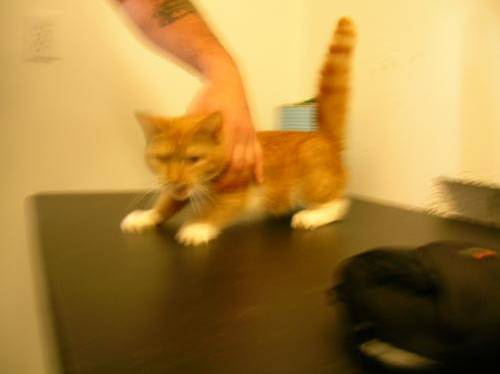

In [4]:
from pathlib import Path
from PIL import Image

# taking a look at the first two images of the training set
image = images_path_list[0]
image2 = images_path_list[1]

# get the class of the image
image_class = Path(image).parent.stem
image2_class = Path(image2).parent.stem

# open the image
image = Image.open(image)
image2 = Image.open(image2)

print("Class: ", image_class)
image

Class:  cat


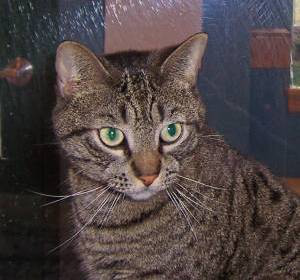

In [5]:
print("Class: ", image2_class)
image2

## Plotting the sample images as arrays/grids and seeing what their shapes are.

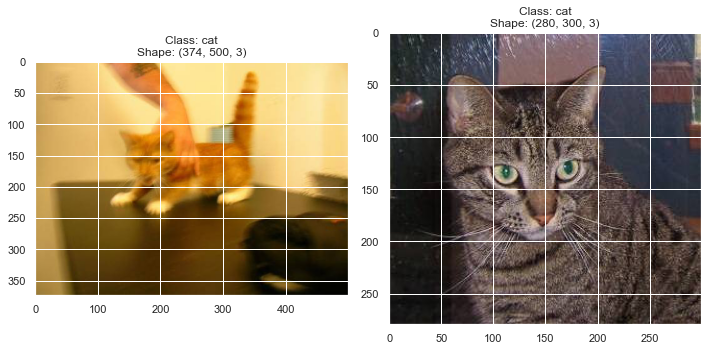

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# convert image into array
image_array = np.asarray(image)
image2_array = np.asarray(image2)

# plot images
plt.figure(figsize=(10, 5))

# plot the first image
plt.subplot(1, 2, 1)
plt.imshow(image_array)
plt.title(f"Class: {image_class}\nShape: {image_array.shape}")

# plot the second image
plt.subplot(1, 2, 2)
plt.imshow(image2_array)
plt.title(f"Class: {image2_class}\nShape: {image2_array.shape}")

plt.tight_layout()

Observed in the above cell output, the first image has a shape of 374 by 500 by 3 (374, 500, 3) and the second image has a shape of 280 by 300 by 3 (280, 300, 3). This means that each image is three-dimensional. The first two numbers of each image's shape represent the number of pixels in each dimension. For example, image 1 has $ 374 \times 500 $ pixels. The third number/dimension of each image's shape represents the number of channels, which in this case would be the rgb values for each pixel.

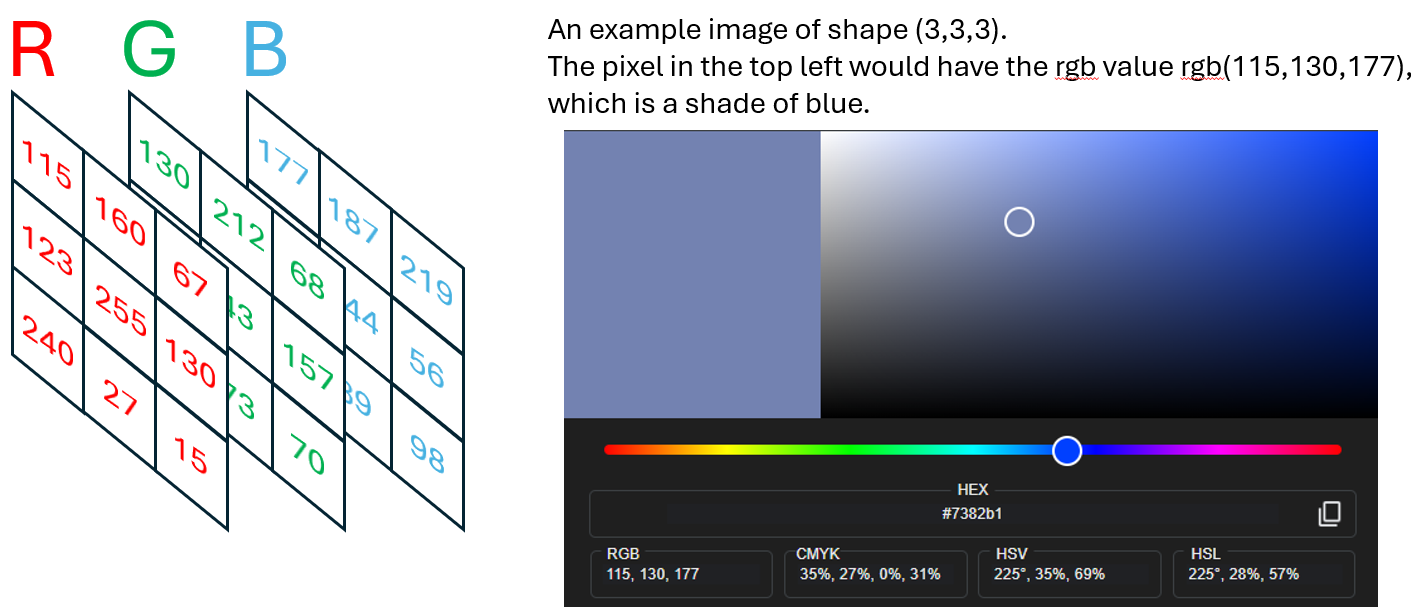

## Transforming the Data
We resize each image into 128 by 128 pixels so that it can fit into the input of the CNN model (which we will design to take in tensors that is of size (128, 128, 3).

a tensor is a 3D array, like how a matrix is a 2D array.

so this tensor is made up 3 matrices that are 128x128 each.


### Data augmentation
We do a random horizontal flip on random images in our dataset (probability of it flipping = 50%), and adding Gaussian Blur.


then convert the each data point into a tensor.

In [7]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

size = (128, 128)

transform = transforms.Compose([
    transforms.Resize(size=size),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2)),
    transforms.ToTensor()
])

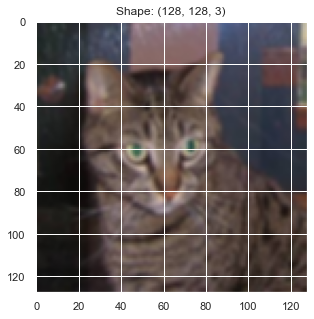

In [8]:
transformed_image = transform(image2)

transformed_image_array = transformed_image.permute(1, 2, 0).numpy()

plt.figure(figsize=(5, 5))
plt.imshow(transformed_image_array)
plt.title(f"Shape: {transformed_image_array.shape}")
plt.show()

In [9]:
from torchvision import datasets

transform_validation = transforms.Compose([
    transforms.Resize(size=size),
    transforms.ToTensor()
])

# training data
train_data = datasets.ImageFolder(
    root=train_dir,
    transform=transform
)

# validation data
val_data = datasets.ImageFolder(
    root=val_dir,
    transform=transform_validation
)

In [10]:
train_data, val_data

(Dataset ImageFolder
     Number of datapoints: 20000
     Root location: datasets/train
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2))
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 5000
     Root location: datasets/val
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [11]:
print("Classes: ", train_data.classes)
print("Classes as IDs: ", train_data.class_to_idx)
print("Length of training data: ", len(train_data))
print("Length of validation data: ", len(val_data))

Classes:  ['cat', 'dog']
Classes as IDs:  {'cat': 0, 'dog': 1}
Length of training data:  20000
Length of validation data:  5000


In [12]:
# taking the first image as an example
print(f"Image as a tensor: \n{train_data[0][0]}")
print(f"Image's shape: {train_data[0][0].shape}")

Image as a tensor: 
tensor([[[0.8118, 0.8157, 0.8314,  ..., 0.9647, 0.9569, 0.9569],
         [0.8118, 0.8157, 0.8314,  ..., 0.9647, 0.9569, 0.9569],
         [0.8118, 0.8157, 0.8314,  ..., 0.9647, 0.9608, 0.9569],
         ...,
         [0.6196, 0.6235, 0.6314,  ..., 0.0118, 0.0078, 0.0078],
         [0.6118, 0.6157, 0.6196,  ..., 0.0078, 0.0078, 0.0078],
         [0.6078, 0.6078, 0.6157,  ..., 0.0078, 0.0078, 0.0078]],

        [[0.6588, 0.6627, 0.6784,  ..., 0.8157, 0.8039, 0.7961],
         [0.6588, 0.6627, 0.6784,  ..., 0.8157, 0.8039, 0.8000],
         [0.6588, 0.6627, 0.6784,  ..., 0.8235, 0.8118, 0.8039],
         ...,
         [0.4902, 0.4941, 0.5020,  ..., 0.0118, 0.0118, 0.0118],
         [0.4863, 0.4902, 0.4980,  ..., 0.0118, 0.0078, 0.0078],
         [0.4863, 0.4863, 0.4941,  ..., 0.0078, 0.0078, 0.0078]],

        [[0.3569, 0.3608, 0.3725,  ..., 0.4980, 0.4863, 0.4824],
         [0.3569, 0.3608, 0.3725,  ..., 0.5020, 0.4902, 0.4863],
         [0.3569, 0.3608, 0.3725,  ...

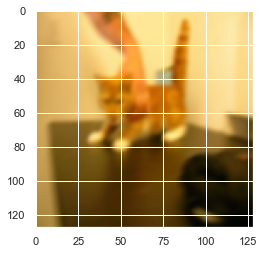

In [13]:
test_image = train_data[0][0]

plt.imshow(test_image.permute(1, 2, 0))

In [14]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)

train_loader, val_loader

(<torch.utils.data.dataloader.DataLoader at 0x1a40c240e50>,
 <torch.utils.data.dataloader.DataLoader at 0x1a40c4d7eb0>)

<h2><b>MAXPOOL:</b> in the kernel size, take the largest value in that kernel. then stride.</h2>

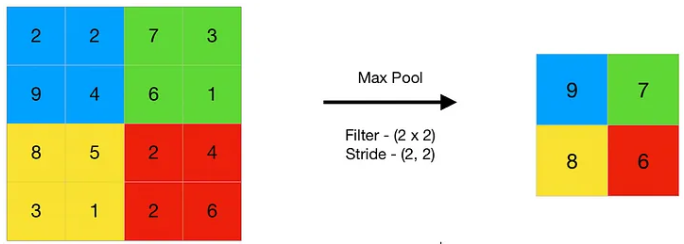

# Changes from older model to now:
#### added dropout, removed scheduler, increased epochs to 30

In [15]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # ReLU, MaxPool, and dropout
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
        self.dropout = nn.Dropout(p=0.5)
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(
            in_channels=3, 
            out_channels=32, 
            kernel_size=5, 
            stride=1,
            padding=2
        )
        self.bn1 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(32, 64, 5, 1, 2)
        self.bn2 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.bn3 = nn.BatchNorm2d(128)
        
        # fully connected layers
        self.fc1 = nn.Linear(128 * 16 * 16, 256)
        self.fc2 = nn.Linear(256, 2)
        
    def forward(self, x):
        # 128x128 -> 64x64
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        # 64x64 -> 32x32
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        # 32x32 -> 16x16
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

In [16]:
# Instantiate the model
model = CNN().to(device)

# Cross Entropy Loss
criterion = nn.CrossEntropyLoss()

# Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

import time
from datetime import timedelta
from tqdm import tqdm

num_epochs = 30

total_start_time = time.time()

# for record keeping purposes to plot graph later on
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# best val accuracy
best_val_acc = 0.0

for epoch in range(num_epochs):
    epoch_start_time = time.time()
    
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{num_epochs}"):
        images = images.to(device)
        labels = labels.to(device)

        # 1. zero gradient of the optimizer
        optimizer.zero_grad()

        # 2. model outputs
        outputs = model(images)
        
        # 3. let the loss function calculate loss
        loss = criterion(outputs, labels)
        
        # 4. loss backward
        loss.backward()
        
        # 5. optimizer step
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = 100 * correct / total

    # Validation
    model.eval() # Set model to evaluation mode
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_running_loss / len(val_loader.dataset)
    val_acc = 100 * val_correct / val_total
    
    # update best validation accuracy
    if val_acc > best_val_acc:
        best_val_acc = val_acc
    
    # add to record keeping purposes
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    epoch_end_time = time.time()
    epoch_duration = epoch_end_time - epoch_start_time
    epoch_duration_formatted = str(timedelta(seconds=int(epoch_duration)))

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%, "
          f"Time: {epoch_duration_formatted}")

total_end_time = time.time()
total_training_time = total_end_time - total_start_time
total_training_time_formatted = str(timedelta(seconds=int(total_training_time)))

print(f"Total Training Time: {total_training_time_formatted}")
print(f"Best Validation Accuracy: {best_val_acc:.2f}%")

Training Epoch 1/30: 100%|███████████████████████████████████████████████████████████| 625/625 [02:48<00:00,  3.70it/s]


Epoch [1/30], Train Loss: 0.6023, Train Acc: 68.08%, Val Loss: 0.5244, Val Acc: 74.76%, Time: 0:03:25


Training Epoch 2/30: 100%|███████████████████████████████████████████████████████████| 625/625 [01:34<00:00,  6.64it/s]


Epoch [2/30], Train Loss: 0.5166, Train Acc: 74.44%, Val Loss: 0.5515, Val Acc: 71.30%, Time: 0:01:51


Training Epoch 3/30: 100%|███████████████████████████████████████████████████████████| 625/625 [01:32<00:00,  6.73it/s]


Epoch [3/30], Train Loss: 0.4673, Train Acc: 77.91%, Val Loss: 0.4334, Val Acc: 79.32%, Time: 0:01:46


Training Epoch 4/30: 100%|███████████████████████████████████████████████████████████| 625/625 [01:33<00:00,  6.66it/s]


Epoch [4/30], Train Loss: 0.4391, Train Acc: 79.86%, Val Loss: 0.5883, Val Acc: 68.00%, Time: 0:01:49


Training Epoch 5/30: 100%|███████████████████████████████████████████████████████████| 625/625 [01:29<00:00,  6.96it/s]


Epoch [5/30], Train Loss: 0.4120, Train Acc: 81.44%, Val Loss: 0.3897, Val Acc: 82.80%, Time: 0:01:45


Training Epoch 6/30: 100%|███████████████████████████████████████████████████████████| 625/625 [01:32<00:00,  6.74it/s]


Epoch [6/30], Train Loss: 0.3969, Train Acc: 82.33%, Val Loss: 0.4096, Val Acc: 80.40%, Time: 0:01:47


Training Epoch 7/30: 100%|███████████████████████████████████████████████████████████| 625/625 [01:33<00:00,  6.67it/s]


Epoch [7/30], Train Loss: 0.3822, Train Acc: 83.14%, Val Loss: 0.4311, Val Acc: 81.74%, Time: 0:01:49


Training Epoch 8/30: 100%|███████████████████████████████████████████████████████████| 625/625 [01:33<00:00,  6.69it/s]


Epoch [8/30], Train Loss: 0.3712, Train Acc: 83.78%, Val Loss: 0.3718, Val Acc: 83.22%, Time: 0:01:48


Training Epoch 9/30: 100%|███████████████████████████████████████████████████████████| 625/625 [01:33<00:00,  6.65it/s]


Epoch [9/30], Train Loss: 0.3545, Train Acc: 84.48%, Val Loss: 0.3587, Val Acc: 83.80%, Time: 0:01:49


Training Epoch 10/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:32<00:00,  6.75it/s]


Epoch [10/30], Train Loss: 0.3446, Train Acc: 84.83%, Val Loss: 0.5024, Val Acc: 77.08%, Time: 0:01:46


Training Epoch 11/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:32<00:00,  6.79it/s]


Epoch [11/30], Train Loss: 0.3372, Train Acc: 85.45%, Val Loss: 0.3928, Val Acc: 82.32%, Time: 0:01:45


Training Epoch 12/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:33<00:00,  6.70it/s]


Epoch [12/30], Train Loss: 0.3259, Train Acc: 85.98%, Val Loss: 0.3494, Val Acc: 84.94%, Time: 0:01:48


Training Epoch 13/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:42<00:00,  6.11it/s]


Epoch [13/30], Train Loss: 0.3154, Train Acc: 86.62%, Val Loss: 0.3534, Val Acc: 84.80%, Time: 0:01:59


Training Epoch 14/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:58<00:00,  5.29it/s]


Epoch [14/30], Train Loss: 0.3012, Train Acc: 87.00%, Val Loss: 0.3398, Val Acc: 85.46%, Time: 0:02:15


Training Epoch 15/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:52<00:00,  5.57it/s]


Epoch [15/30], Train Loss: 0.2973, Train Acc: 87.23%, Val Loss: 0.3486, Val Acc: 84.84%, Time: 0:02:07


Training Epoch 16/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:46<00:00,  5.84it/s]


Epoch [16/30], Train Loss: 0.2896, Train Acc: 87.37%, Val Loss: 0.3515, Val Acc: 85.32%, Time: 0:02:03


Training Epoch 17/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:38<00:00,  6.34it/s]


Epoch [17/30], Train Loss: 0.2803, Train Acc: 87.93%, Val Loss: 0.3345, Val Acc: 84.94%, Time: 0:01:53


Training Epoch 18/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:31<00:00,  6.82it/s]


Epoch [18/30], Train Loss: 0.2793, Train Acc: 88.14%, Val Loss: 0.3097, Val Acc: 87.14%, Time: 0:01:45


Training Epoch 19/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:38<00:00,  6.33it/s]


Epoch [19/30], Train Loss: 0.2652, Train Acc: 88.83%, Val Loss: 0.3209, Val Acc: 86.36%, Time: 0:01:52


Training Epoch 20/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:37<00:00,  6.40it/s]


Epoch [20/30], Train Loss: 0.2514, Train Acc: 88.98%, Val Loss: 0.3367, Val Acc: 86.74%, Time: 0:01:51


Training Epoch 21/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:31<00:00,  6.87it/s]


Epoch [21/30], Train Loss: 0.2475, Train Acc: 89.47%, Val Loss: 0.3227, Val Acc: 86.92%, Time: 0:01:45


Training Epoch 22/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:32<00:00,  6.74it/s]


Epoch [22/30], Train Loss: 0.2465, Train Acc: 89.54%, Val Loss: 0.3253, Val Acc: 87.36%, Time: 0:01:48


Training Epoch 23/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:34<00:00,  6.62it/s]


Epoch [23/30], Train Loss: 0.2371, Train Acc: 90.00%, Val Loss: 0.3895, Val Acc: 86.52%, Time: 0:01:51


Training Epoch 24/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:34<00:00,  6.58it/s]


Epoch [24/30], Train Loss: 0.2310, Train Acc: 89.97%, Val Loss: 0.4278, Val Acc: 84.68%, Time: 0:01:48


Training Epoch 25/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:34<00:00,  6.58it/s]


Epoch [25/30], Train Loss: 0.2300, Train Acc: 90.50%, Val Loss: 0.3958, Val Acc: 84.14%, Time: 0:01:51


Training Epoch 26/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:35<00:00,  6.57it/s]


Epoch [26/30], Train Loss: 0.2200, Train Acc: 90.83%, Val Loss: 0.3542, Val Acc: 87.80%, Time: 0:01:50


Training Epoch 27/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:32<00:00,  6.79it/s]


Epoch [27/30], Train Loss: 0.2107, Train Acc: 91.12%, Val Loss: 0.3552, Val Acc: 86.44%, Time: 0:01:46


Training Epoch 28/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:33<00:00,  6.71it/s]


Epoch [28/30], Train Loss: 0.2090, Train Acc: 91.08%, Val Loss: 0.5915, Val Acc: 81.10%, Time: 0:01:48


Training Epoch 29/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:32<00:00,  6.78it/s]


Epoch [29/30], Train Loss: 0.2038, Train Acc: 91.28%, Val Loss: 0.3131, Val Acc: 88.20%, Time: 0:01:47


Training Epoch 30/30: 100%|██████████████████████████████████████████████████████████| 625/625 [01:30<00:00,  6.90it/s]


Epoch [30/30], Train Loss: 0.1986, Train Acc: 91.45%, Val Loss: 0.3568, Val Acc: 85.94%, Time: 0:01:46
Total Training Time: 0:57:06
Best Validation Accuracy: 88.20%


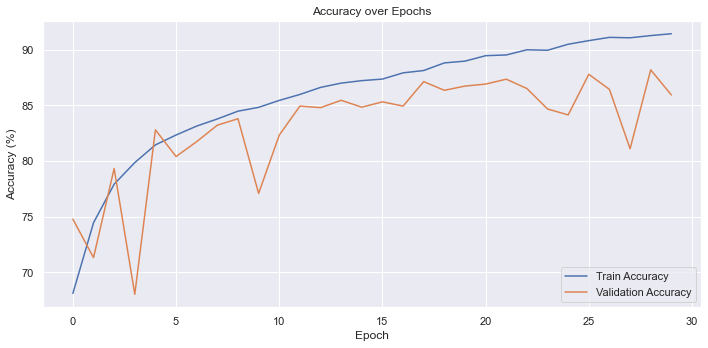

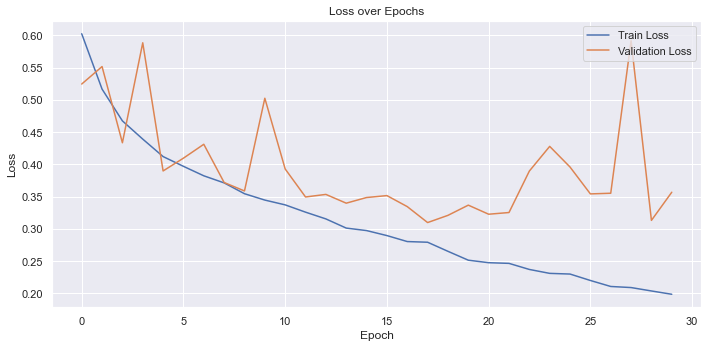

In [17]:
# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy over Epochs')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
class_names = train_data.classes

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
print(cm)
print(classification_report(y_true, y_pred, target_names=class_names))

[[1932  568]
 [ 135 2365]]
              precision    recall  f1-score   support

         cat       0.93      0.77      0.85      2500
         dog       0.81      0.95      0.87      2500

    accuracy                           0.86      5000
   macro avg       0.87      0.86      0.86      5000
weighted avg       0.87      0.86      0.86      5000



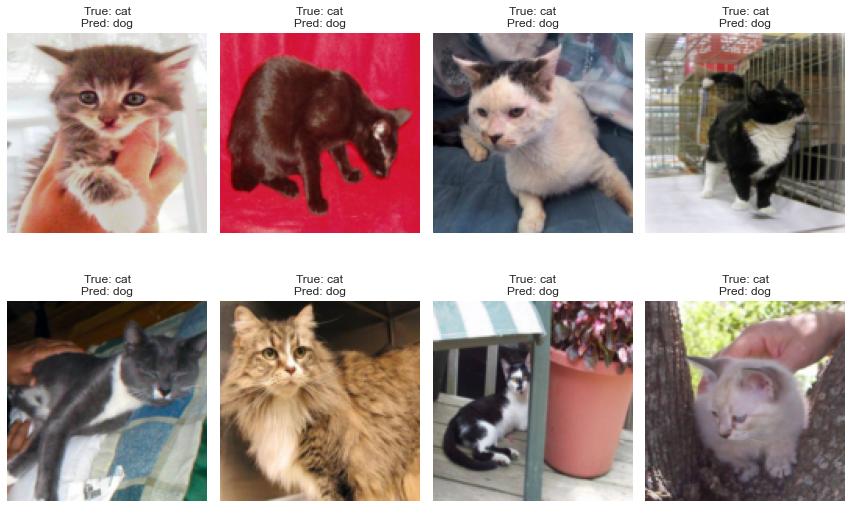

In [20]:
misclassified_images = []
misclassified_labels = []
misclassified_preds = []

model.eval()

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Identify misclassified images
        incorrect = (predicted != labels)
        if incorrect.any():
            # Collect misclassified images and labels
            misclassified_images.extend(images[incorrect].cpu())
            misclassified_labels.extend(labels[incorrect].cpu())
            misclassified_preds.extend(predicted[incorrect].cpu())
            

# Plot a few misclassified images
num_images = 8  # Number of images to display
plt.figure(figsize=(12, 8))
for idx in range(num_images):
    if idx >= len(misclassified_images):
        break
    img = misclassified_images[idx]
    true_label = misclassified_labels[idx].item()
    pred_label = misclassified_preds[idx].item()

    plt.subplot(2, 4, idx+1)
    img = img.numpy().transpose((1, 2, 0))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")
plt.tight_layout()
plt.show()

# Test Set

In [29]:
test_dir = 'datasets/test'

test_transform = transforms.Compose([
    transforms.Resize(size=size),
    transforms.ToTensor()
])

In [30]:
from torch.utils.data import Dataset

class TestDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []

        for filename in os.listdir(root_dir):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                self.images.append(filename)
        
        self.images.sort(key=lambda x: int(os.path.splitext(x)[0]))
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.root_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, img_name 

In [31]:
import os

test_data = TestDataset(root_dir=test_dir, transform=test_transform)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [33]:
import csv

model.eval()

print("Class Indices:", train_data.class_to_idx)

predictions = []

with torch.no_grad():
    id_counter = 1  # Start IDs from 1
    for images, filenames in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predicted = predicted.cpu()
        for pred in predicted:
            label = pred.item()  # 0 or 1
            predictions.append((id_counter, label))
            id_counter += 1
            
with open('submission.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['id', 'label'])
    writer.writerows(predictions)

Class Indices: {'cat': 0, 'dog': 1}
